# DoorDash Project
## --Predicting delivery time--

## 1. DATA PREPARATION

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
df = pd.read_csv('doordash.csv')
df.head(2)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0


### 1.1 Data Exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

To-do: Handle missing values; handle categorical data - market_id, store_id, store_primary_cateogry, order_protocol; handle datetime

#### Formatting columns

In [126]:
from datetime import datetime

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

#### Create necessary features

In [127]:
df['actual_total_delivery_time'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()
df.head(2)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0


In [128]:
# Delivery process should be splitted into: prep & non-prep time

df['estimated_non_prep_duration'] = (df['estimated_order_place_duration'] + df['estimated_store_to_consumer_driving_duration'])
df.head(2)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_time,estimated_non_prep_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0


In [129]:
# Busy dashers ratio - the proportion of busy dashers at the time order was placed

df['busy_dashers_ratio'] = df['total_busy_dashers']/df['total_onshift_dashers']
df.head(2)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_time,estimated_non_prep_duration,busy_dashers_ratio
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000


### 1.2 Data Preparation

#### Encoding categorical variables

In [87]:
for n in ['market_id', 'store_id', 'order_protocol']:
    print(n, ':', df[n].nunique())

market_id : 6
store_id : 6743
order_protocol : 7


TO-DO: Remove store_id; convert market_id and order_protocol into numercial variables

#### Handle missing values in store_primary_category before removing store_id

In [65]:
df['store_primary_category'].isnull().sum()

4760

In [130]:
# Assign store id to most frequent catetgory

store_id_unique = df['store_id'].unique().tolist()
#store_id_category = {store_id : df[df['store_id']==store_id]['store_primary_category'].mode() for store_id in store_id_unique}
store_id_category = {store_id: df[df.store_id == store_id].store_primary_category.mode() 
                         for store_id in store_id_unique}

In [131]:
def fill(store_id):
    try:
        return store_id_category[store_id].values[0]
    except:
        return np.nan

df['nan_free_store_primary_category'] = df['store_id'].apply(fill)

In [132]:
order_protocol_dummies = pd.get_dummies(df['order_protocol'])

In [133]:
order_protocol_dummies = order_protocol_dummies.add_prefix('order_protocol_')
order_protocol_dummies.head(2)

,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0


In [134]:
market_id_dummies = pd.get_dummies(df['market_id'])
market_id_dummies = market_id_dummies.add_prefix('market_id_')
market_id_dummies.head(2)

,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,1,0,0,0,0,0
1,0,1,0,0,0,0


In [135]:
store_primary_category_dummies = pd.get_dummies(df['nan_free_store_primary_category'])
store_primary_category_dummies = store_primary_category_dummies.add_prefix('category_')
store_primary_category_dummies.head(2)

,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,category_brazilian,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Dataframe restructuring

In [94]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration',
       'actual_total_delivery_time', 'estimated_non_prep_duration',
       'busy_dashers_ratio', 'nan_free_store_primary_category'],
      dtype='object')

In [136]:
train_df = df.drop(columns=['market_id','created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol','nan_free_store_primary_category'])
train_df.head(2)

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_time,estimated_non_prep_duration,busy_dashers_ratio
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000


In [137]:
train_df = pd.concat([train_df, market_id_dummies, order_protocol_dummies, store_primary_category_dummies], axis=1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 100 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   total_items                                   197428 non-null  int64  
 1   subtotal                                      197428 non-null  int64  
 2   num_distinct_items                            197428 non-null  int64  
 3   min_item_price                                197428 non-null  int64  
 4   max_item_price                                197428 non-null  int64  
 5   total_onshift_dashers                         181166 non-null  float64
 6   total_busy_dashers                            181166 non-null  float64
 7   total_outstanding_orders                      181166 non-null  float64
 8   estimated_order_place_duration                197428 non-null  int64  
 9   estimated_store_to_consumer_driving_duration  1

In [138]:
train_df.astype('float32')
train_df.head(2)

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,...,0,0,0,0,0,0,0,0,0,0


#### Handle inf and na values

We check for inf values in busy_dashers_ratio because the ratio was calculated by diving operation. Therefore somestime output will be inf if number is positive and -inf if number is negative

In [139]:
train_df['busy_dashers_ratio'].describe()

count    1.775900e+05
mean              NaN
std               NaN
min              -inf
25%      8.269231e-01
50%      9.622642e-01
75%      1.000000e+00
max               inf
Name: busy_dashers_ratio, dtype: float64

In [140]:
np.where(np.any(~np.isfinite(train_df), axis=0)==True)

(array([ 5,  6,  7,  9, 10, 11, 12], dtype=int64),)

In [141]:
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
train_df.shape

(177070, 100)

In [101]:
train_df.isna().sum().sum()

0

## 2. COLLINEARITY AND REMOVING REDUNDANCIES

Check for Collinearity when two or more predictor variables are highly correlated with each other

#### Create heatmap with mask

<Axes: >

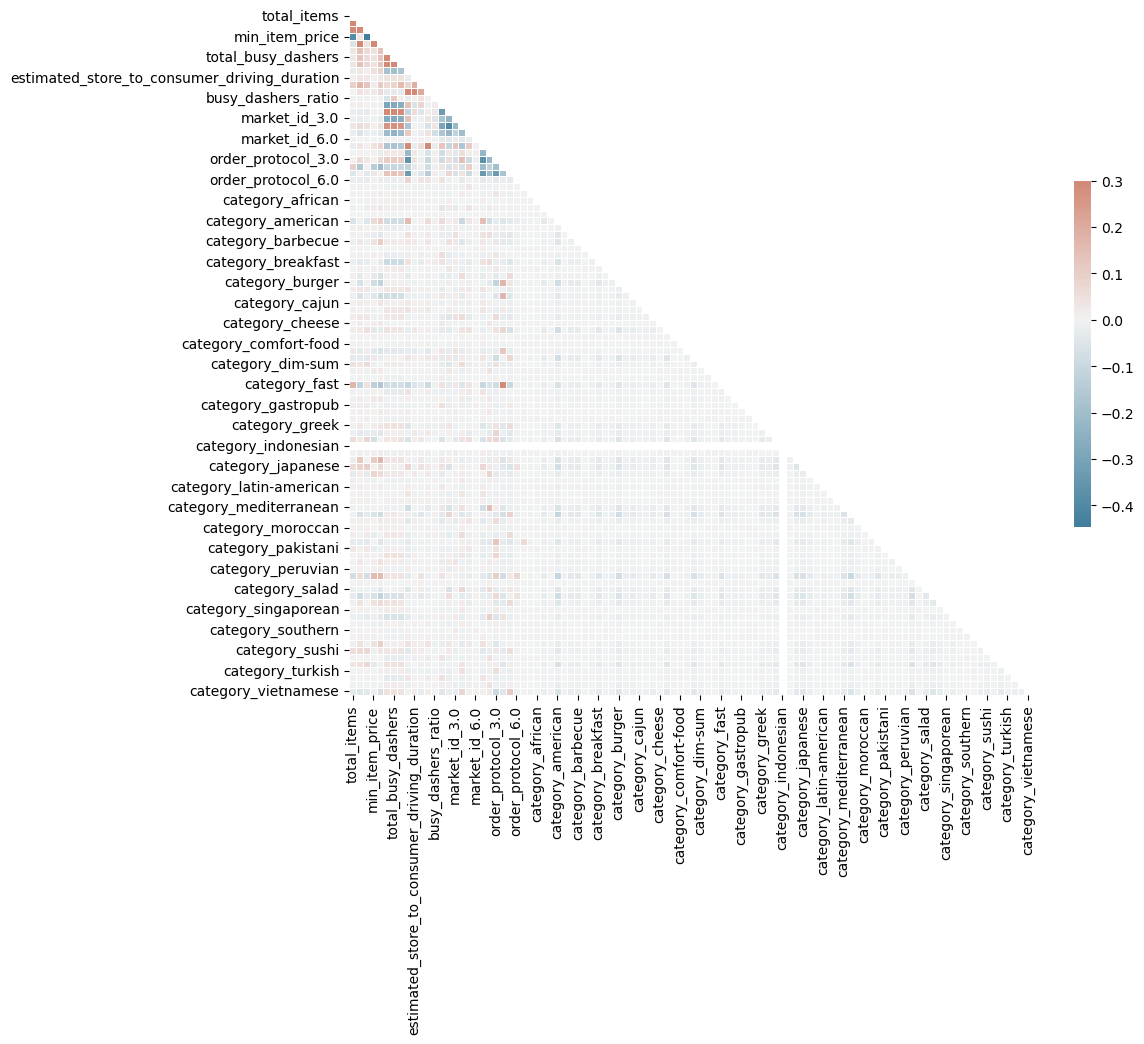

In [103]:
corr = train_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

There seems to be an issue with category_indonesian

In [104]:
train_df['category_indonesian'].describe()

count    177070.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: category_indonesian, dtype: float64

It has 177,070 zeros, so we can drop this one.

In [142]:
train_df.drop('category_indonesian', axis=1, inplace=True)

#### Removing redundant pairs

In [143]:
def get_redundant_pairs(df):
    cols = df.columns
    pairs = set()
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs.add((cols[i], cols[j]))
    return pairs

In [144]:
def get_top_abs_corr(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [145]:
print('Top Absolute Correlation')
print(get_top_abs_corr(train_df, 20))

Top Absolute Correlation
total_onshift_dashers                         total_busy_dashers             0.941741
                                              total_outstanding_orders       0.934639
total_busy_dashers                            total_outstanding_orders       0.931295
estimated_store_to_consumer_driving_duration  estimated_non_prep_duration    0.923086
estimated_order_place_duration                order_protocol_1.0             0.897645
total_items                                   num_distinct_items             0.758146
subtotal                                      num_distinct_items             0.682890
total_items                                   subtotal                       0.557175
min_item_price                                max_item_price                 0.541241
subtotal                                      max_item_price                 0.507947
order_protocol_4.0                            category_fast                  0.489946
num_distinct_items           

There are many pairs that have high correlations which may cause collinearity. We should find the best model that avoids correlation. First, let's concat order_protocol_dummies only

In [119]:
train_df = df.drop(columns=["created_at", "market_id", "store_id", "store_primary_category", "actual_delivery_time", 
                                        "nan_free_store_primary_category", "order_protocol"])
train_df = pd.concat([train_df, order_protocol_dummies], axis=1)
train_df = train_df.drop(columns=["total_onshift_dashers", "total_busy_dashers", "estimated_non_prep_duration"])
train_df = train_df.astype('float32')

train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_time,busy_dashers_ratio,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3779.0,0.424242,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4024.0,2.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,1781.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,3075.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,2390.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
print('Top Absolute Correlation')
print(get_top_abs_corr(train_df, 20))

Top Absolute Correlation
estimated_order_place_duration  order_protocol_1.0    0.897645
total_items                     num_distinct_items    0.758146
subtotal                        num_distinct_items    0.682890
total_items                     subtotal              0.557175
min_item_price                  max_item_price        0.541241
subtotal                        max_item_price        0.507947
num_distinct_items              min_item_price        0.446733
total_items                     min_item_price        0.389277
order_protocol_1.0              order_protocol_3.0    0.373581
estimated_order_place_duration  order_protocol_3.0    0.364170
order_protocol_1.0              order_protocol_5.0    0.342345
estimated_order_place_duration  order_protocol_5.0    0.333291
order_protocol_3.0              order_protocol_5.0    0.332533
order_protocol_1.0              order_protocol_2.0    0.226903
estimated_order_place_duration  order_protocol_2.0    0.221215
order_protocol_2.0            

Now, let’s concatenate the dummies without adding order_protocol_dummies.

In [146]:
train_df = df.drop(columns=["created_at", "market_id", "store_id", "store_primary_category", "actual_delivery_time", 
                                        "nan_free_store_primary_category", "order_protocol"])
train_df = pd.concat([train_df, store_primary_category_dummies], axis=1)
train_df = train_df.drop(columns=["total_onshift_dashers", "total_busy_dashers",
   "category_indonesian", "estimated_non_prep_duration"])
train_df = train_df.astype('float32')

train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_time,busy_dashers_ratio,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3779.0,0.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4024.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,1781.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,3075.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,2390.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
print('Top Absolute Correlation')
print(get_top_abs_corr(train_df, 20))

Top Absolute Correlation
total_items                                   num_distinct_items                0.758146
subtotal                                      num_distinct_items                0.682890
total_items                                   subtotal                          0.557175
min_item_price                                max_item_price                    0.541241
subtotal                                      max_item_price                    0.507947
num_distinct_items                            min_item_price                    0.446733
total_items                                   min_item_price                    0.389277
estimated_store_to_consumer_driving_duration  actual_total_delivery_time        0.188418
subtotal                                      actual_total_delivery_time        0.172312
total_outstanding_orders                      estimated_order_place_duration    0.171049
total_items                                   category_fast                     0.170

#### Create New Features To Overcome The Multicollinearity Issues

In [148]:
train_df['percent_distinct_item_of_total'] = train_df['num_distinct_items']/train_df['total_items']
train_df['avg_price_per_item'] = train_df['subtotal']/train_df['total_items']
train_df.drop(columns=['num_distinct_items', 'subtotal'], axis=1, inplace=True)

print('Top Absolute Correlation')
print(get_top_abs_corr(train_df, 20))

Top Absolute Correlation
min_item_price                                avg_price_per_item                0.860580
max_item_price                                avg_price_per_item                0.770382
min_item_price                                max_item_price                    0.541241
total_items                                   percent_distinct_item_of_total    0.445751
                                              min_item_price                    0.389277
                                              avg_price_per_item                0.310759
percent_distinct_item_of_total                avg_price_per_item                0.226711
category_pizza                                avg_price_per_item                0.225510
estimated_store_to_consumer_driving_duration  actual_total_delivery_time        0.188418
max_item_price                                percent_distinct_item_of_total    0.178021
category_fast                                 avg_price_per_item                0.175

In [149]:
train_df['price_range_of_items'] = train_df['max_item_price'] - train_df['min_item_price']
train_df.drop(columns=['max_item_price', 'min_item_price'], inplace=True)
print('Top Absolute Correlation')
print(get_top_abs_corr(train_df, 20))

Top Absolute Correlation
total_items                                   percent_distinct_item_of_total    0.445751
                                              price_range_of_items              0.333304
                                              avg_price_per_item                0.310759
percent_distinct_item_of_total                avg_price_per_item                0.226711
category_pizza                                avg_price_per_item                0.225510
estimated_store_to_consumer_driving_duration  actual_total_delivery_time        0.188418
category_fast                                 avg_price_per_item                0.175950
total_outstanding_orders                      estimated_order_place_duration    0.171049
total_items                                   category_fast                     0.170988
category_italian                              avg_price_per_item                0.158193
total_outstanding_orders                      actual_total_delivery_time        0.157

In [150]:
train_df.shape

(177070, 82)


## 3. MULTICOLLINEARITY AND FEATURE SELECTION

#### Identifying multicollinearity using Variance Inflation Factor (VIF) method

In [154]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(features):
    vif_data = pd.DataFrame()
    vif_data['feature']=features
    vif_data['VIF']=[variance_inflation_factor(train_df[features].values, i) for i in range(len(features))]
    return vif_data.sort_values(by='VIF').reset_index(drop=True)

In [156]:
features = train_df.drop('actual_total_delivery_time', axis=1).columns.tolist()
vif_data = compute_vif(features)
vif_data

,feature,VIF
0,category_alcohol-plus-food,1.000371
1,category_chocolate,1.000493
2,category_belgian,1.000749
3,category_russian,1.003226
4,category_african,1.003820
...,...,...
76,busy_dashers_ratio,6.369592
77,category_american,7.033601
78,estimated_store_to_consumer_driving_duration,7.210822
79,estimated_order_place_duration,13.472126


We will drop features that have high VIF scores > 20

In [157]:
multicollinearity = True

while multicollinearity:
    highest_vif_feature = vif_data['feature'].values.tolist()[-1]
    print('Remove', highest_vif_feature)
    features.remove(highest_vif_feature)
    vif_data = compute_vif(features)
    multicollinearity = False if len(vif_data[vif_data['VIF'] > 20])==0 else True

selected_features = vif_data['feature'].values.tolist()
vif_data

Remove percent_distinct_item_of_total


,feature,VIF
0,category_alcohol-plus-food,1.000222
1,category_chocolate,1.000365
2,category_belgian,1.000451
3,category_russian,1.002016
4,category_gluten-free,1.002363
...,...,...
75,category_american,4.505927
76,avg_price_per_item,5.958955
77,busy_dashers_ratio,6.357884
78,estimated_store_to_consumer_driving_duration,7.192622


#### Feature selection using Gini's importance

In [161]:
from sklearn.model_selection import train_test_split

X = train_df[selected_features]
y = train_df['actual_total_delivery_time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

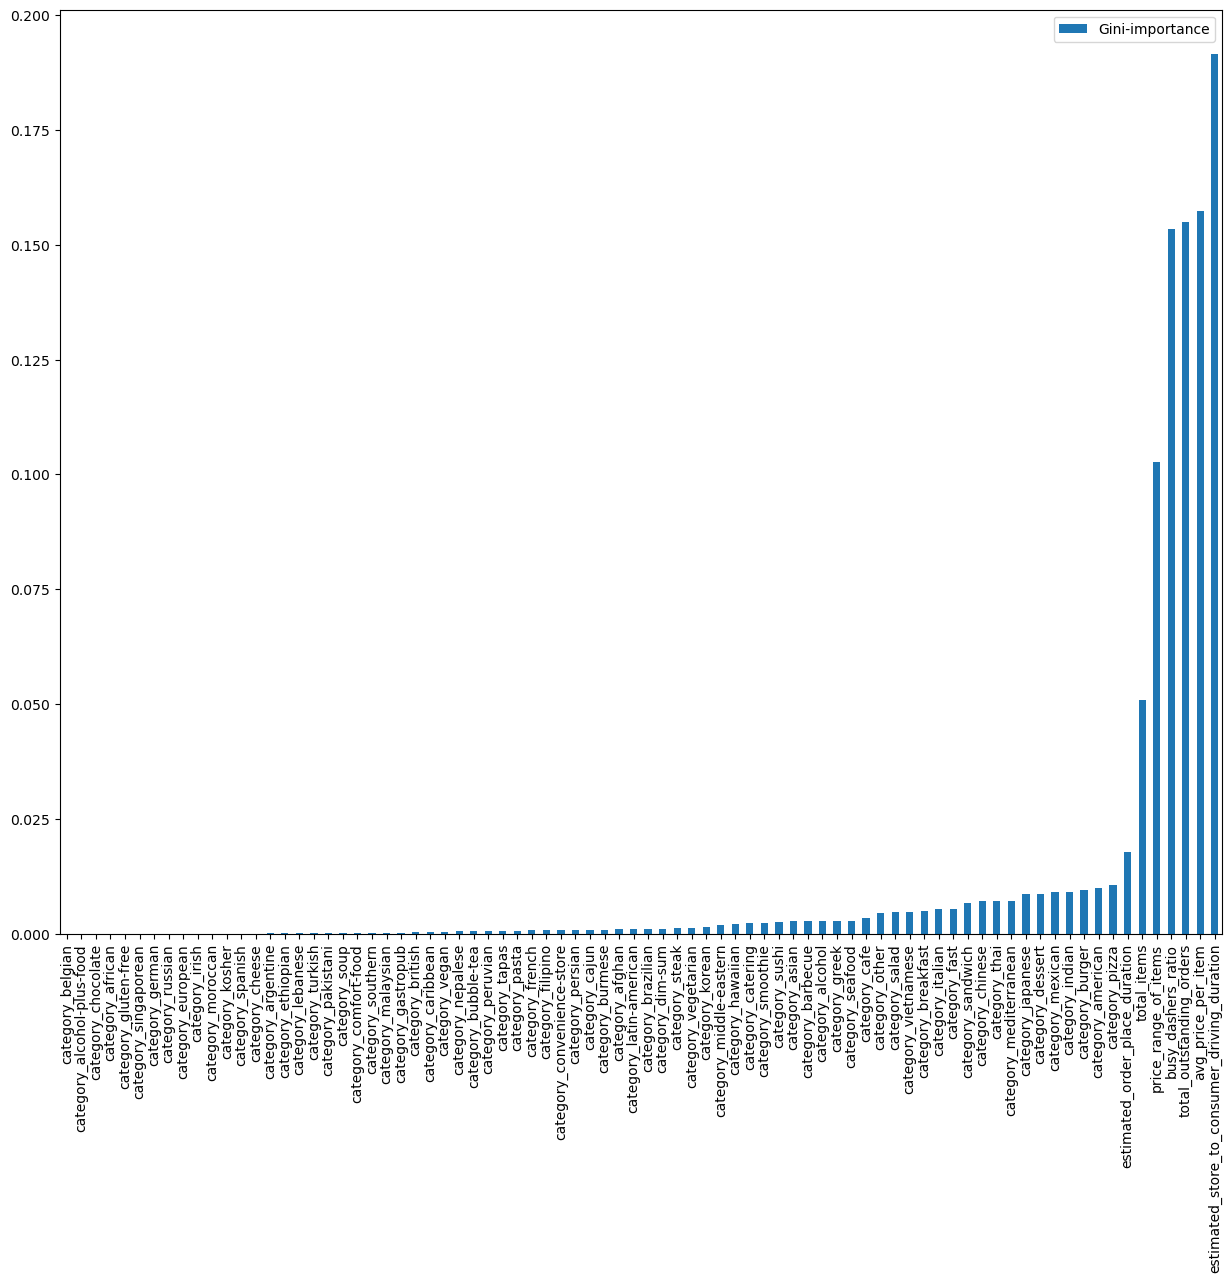

In [162]:
from sklearn.ensemble import RandomForestRegressor

feature_names = [f"feature {i}" for i in range((X.shape[1]))]
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, forest.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(15,12))
plt.show()

It looks a little bit complicated, so let’s minimize this graph by 35 of the best.

In [165]:
importances.sort_values(by='Gini-importance')[-35:].index.tolist()

['category_middle-eastern',
 'category_hawaiian',
 'category_catering',
 'category_smoothie',
 'category_sushi',
 'category_asian',
 'category_barbecue',
 'category_alcohol',
 'category_greek',
 'category_seafood',
 'category_cafe',
 'category_other',
 'category_salad',
 'category_vietnamese',
 'category_breakfast',
 'category_italian',
 'category_fast',
 'category_sandwich',
 'category_chinese',
 'category_thai',
 'category_mediterranean',
 'category_japanese',
 'category_dessert',
 'category_mexican',
 'category_indian',
 'category_burger',
 'category_american',
 'category_pizza',
 'estimated_order_place_duration',
 'total_items',
 'price_range_of_items',
 'busy_dashers_ratio',
 'total_outstanding_orders',
 'avg_price_per_item',
 'estimated_store_to_consumer_driving_duration']

#### Further reducing features using PCA

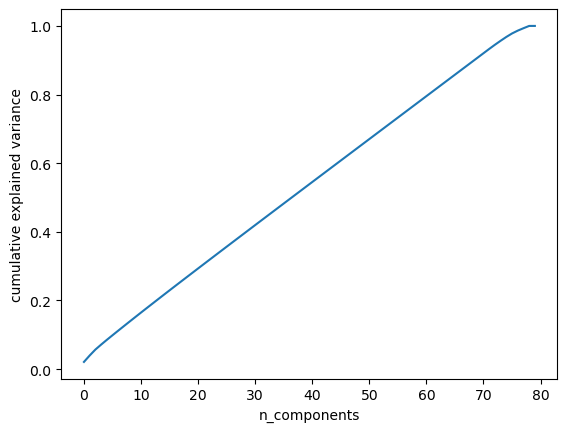

In [166]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_train2 = X_train.values
X_train2 = np.asarray(X_train2)
X_std = StandardScaler().fit_transform(X_train2)
pca = PCA().fit(X_std)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n_components')
plt.ylabel('cumulative explained variance')
plt.show()

We can see that 60 features would explain 80% of our data frame. We already have 80 features, so it is okay.

#### Applying scaler

In [168]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def scale(scaler, X, y):
    X_scaler = scaler
    X_scaler.fit(X=X, y=y)
    X_scaled = X_scaler.transform(X)
    y_scaler = scaler
    y_scaler.fit(y.values.reshape(-1, 1))
    y_scaled = y_scaler.transform(y.values.reshape(-1, 1))
    
    return X_scaled, y_scaled, X_scaler, y_scaler

In [169]:
X_scaled, y_scaled, X_scaler, y_scaler = scale(MinMaxScaler(), X, y)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

#### Inverse transform

To make data the same after scaling it

In [170]:
from sklearn.metrics import mean_squared_error

def rmse_with_inv_transform(scaler, y_test, y_pred_scaled, model_name):
    y_predict = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
    # return RMSE with squared False     
    rmse_error = mean_squared_error(y_test, y_predict[:,0], squared=False)
    print("Error = "'{}'.format(rmse_error)+" in " + model_name)
    
    return rmse_error, y_predict

## 4. BUILDING MACHINE LEARNING MODELS

#### Create a custom function that will fit the models first, then calculate and print the evaluation metrics, train and test error, along with the trained model name with y_predict to then calculate these metrics for all models at once.

In [172]:
def make_regression(X_train, y_train, X_test, y_test, model, model_name, verbose=True):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_train)
    train_error = mean_squared_error(y_train, y_predict, squared=False)
    y_predict = model.predict(X_test)
    test_error = mean_squared_error(y_test, y_predict, squared=False)
    if verbose:
        print('Train error=', train_error, 'in', model_name)
        print('Test error=', test_error, 'in', model_name)
    trained_model = model
    
    return trained_model, y_predict, train_error, test_error

In [175]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model

In [187]:
pred_dict = {
    'regression_model':[],
    'feature_set':[],
    'scaler_name':[],
    'RMSE':[]
}

In [177]:
regression_models = {
    'Ridge':linear_model.Ridge(),
    'DecisionTree':tree.DecisionTreeRegressor(max_depth=6),
    'RandomForest':RandomForestRegressor(),
    'XGBoost':XGBRegressor(),
    'LGBM':LGBMRegressor(),
    'MLP':MLPRegressor()
}

In [178]:
feature_sets = {
    'full dataset': X.columns.tolist(),
    'selected_features_40': importances.sort_values(by='Gini-importance')[-40:].index.tolist(),
    'selected_features_20': importances.sort_values(by='Gini-importance')[-20:].index.tolist(),
    'selected_features_10': importances.sort_values(by='Gini-importance')[-10:].index.tolist(),
}

In [180]:
scalers = {
    'Standard scaler':StandardScaler(),
    'MinMax scaler':MinMaxScaler(),
    'NotScale':None,
}

In [188]:
for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f"-----scaled with {scaler_name}-------- included columns are {feature_set_name}")
        print("")
        for model_name in regression_models.keys():   
            if scaler_name == "NotScale":
                X = train_df[feature_set]
                y = train_df["actual_total_delivery_time"]
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                make_regression(X_train, y_train, X_test, y_test, regression_models[model_name], model_name, verbose=True)
            
            else:
                
                X_scaled, y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name], train_df[feature_set], y)
                X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
                    X_scaled, y_scaled, test_size=0.2, random_state=42)
                _, y_predict_scaled, _, _ = make_regression(X_train_scaled, y_train_scaled[:,0], X_test_scaled, y_test_scaled[:,0], regression_models[model_name], model_name, verbose=False)
                rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test, y_predict_scaled, model_name)

            pred_dict["regression_model"].append(model_name)
            pred_dict["feature_set"].append(feature_set_name)
            pred_dict["scaler_name"].append(scaler_name)
            pred_dict["RMSE"].append(rmse_error)

-----scaled with Standard scaler-------- included columns are full dataset

Error = 2053.69873046875 in Ridge
Error = 2057.2476687088733 in DecisionTree
Error = 2049.2481720841347 in RandomForest
Error = 2036.2498779296875 in XGBoost
Error = 2033.4355809987908 in LGBM
Error = 2038.2073974609375 in MLP
-----scaled with MinMax scaler-------- included columns are full dataset

Error = 2053.962890625 in Ridge
Error = 2057.2476685732177 in DecisionTree
Error = 2048.3428764304495 in RandomForest
Error = 2035.351318359375 in XGBoost
Error = 2034.4499976619875 in LGBM
Error = 2092.399658203125 in MLP
-----scaled with NotScale-------- included columns are full dataset



C:\Users\THANG\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.42534e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train error= 1071.4972 in Ridge
Test error= 2053.6926 in Ridge
Train error= 1067.7815291116704 in DecisionTree
Test error= 2057.2476684096064 in DecisionTree
Train error= 399.05456901559273 in RandomForest
Test error= 2049.1657898204753 in RandomForest
Train error= 968.24713 in XGBoost
Test error= 2036.4321 in XGBoost
Train error= 1017.5549840201221 in LGBM
Test error= 2034.461097275308 in LGBM


C:\Users\THANG\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error= 1053.3374 in MLP
Test error= 2046.6957 in MLP
-----scaled with Standard scaler-------- included columns are selected_features_40

Error = 2054.00439453125 in Ridge
Error = 2056.5292024696128 in DecisionTree
Error = 2048.7361170986096 in RandomForest
Error = 2035.453369140625 in XGBoost
Error = 2034.6538984910121 in LGBM
Error = 2036.0067138671875 in MLP
-----scaled with MinMax scaler-------- included columns are selected_features_40

Error = 2054.27734375 in Ridge
Error = 2056.5292023632996 in DecisionTree
Error = 2049.538741520047 in RandomForest
Error = 2034.2847900390625 in XGBoost
Error = 2035.196536738781 in LGBM
Error = 2169.201416015625 in MLP
-----scaled with NotScale-------- included columns are selected_features_40

Train error= 1072.355 in Ridge
Test error= 2054.0044 in Ridge


C:\Users\THANG\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.55924e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train error= 1067.785563647774 in DecisionTree
Test error= 2056.529202224364 in DecisionTree
Train error= 397.99583090625276 in RandomForest
Test error= 2046.7680623996946 in RandomForest
Train error= 965.68585 in XGBoost
Test error= 2035.7643 in XGBoost
Train error= 1017.1430421117441 in LGBM
Test error= 2034.8058530174258 in LGBM


C:\Users\THANG\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error= 1054.0261 in MLP
Test error= 2046.5547 in MLP
-----scaled with Standard scaler-------- included columns are selected_features_20

Error = 2055.36572265625 in Ridge
Error = 2054.610311207463 in DecisionTree
Error = 2048.7892989151756 in RandomForest
Error = 2037.6336669921875 in XGBoost
Error = 2036.0233846729805 in LGBM
Error = 2036.373046875 in MLP
-----scaled with MinMax scaler-------- included columns are selected_features_20

Error = 2055.653076171875 in Ridge
Error = 2054.6103112689557 in DecisionTree
Error = 2048.728120677641 in RandomForest
Error = 2036.5164794921875 in XGBoost
Error = 2035.581516471472 in LGBM
Error = 2096.03369140625 in MLP
-----scaled with NotScale-------- included columns are selected_features_20

Train error= 1074.5066 in Ridge
Test error= 2055.3657 in Ridge


C:\Users\THANG\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.43858e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train error= 1069.1350906055598 in DecisionTree
Test error= 2054.610311170708 in DecisionTree
Train error= 399.10601275425836 in RandomForest
Test error= 2048.3010937085405 in RandomForest
Train error= 966.1651 in XGBoost
Test error= 2036.2493 in XGBoost
Train error= 1018.9600610110249 in LGBM
Test error= 2035.9494403356318 in LGBM


C:\Users\THANG\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error= 1059.0293 in MLP
Test error= 2049.309 in MLP
-----scaled with Standard scaler-------- included columns are selected_features_10

Error = 2056.568359375 in Ridge
Error = 2054.5971761770547 in DecisionTree
Error = 2053.3801460885657 in RandomForest
Error = 2040.27001953125 in XGBoost
Error = 2038.1313604554389 in LGBM
Error = 2039.1851806640625 in MLP
-----scaled with MinMax scaler-------- included columns are selected_features_10

Error = 2056.882080078125 in Ridge
Error = 2054.5971762373274 in DecisionTree
Error = 2052.7108907185316 in RandomForest
Error = 2039.515625 in XGBoost
Error = 2037.6564489201091 in LGBM
Error = 2077.33642578125 in MLP
-----scaled with NotScale-------- included columns are selected_features_10

Train error= 1076.7279 in Ridge
Test error= 2056.5684 in Ridge
Train error= 1069.2324011708552 in DecisionTree
Test error= 2054.597176140608 in DecisionTree
Train error= 399.9561785486091 in RandomForest
Test error= 2052.3625838402068 in RandomForest
Train 

In [190]:
pred_df = pd.DataFrame(pred_dict)
pred_df

,regression_model,feature_set,scaler_name,RMSE
0,Ridge,full dataset,Standard scaler,2053.698730
1,DecisionTree,full dataset,Standard scaler,2057.247669
2,RandomForest,full dataset,Standard scaler,2049.248172
3,XGBoost,full dataset,Standard scaler,2036.249878
4,LGBM,full dataset,Standard scaler,2033.435581
...,...,...,...,...
67,DecisionTree,selected_features_10,NotScale,2077.336426
68,RandomForest,selected_features_10,NotScale,2077.336426
69,XGBoost,selected_features_10,NotScale,2077.336426
70,LGBM,selected_features_10,NotScale,2077.336426


<Axes: >

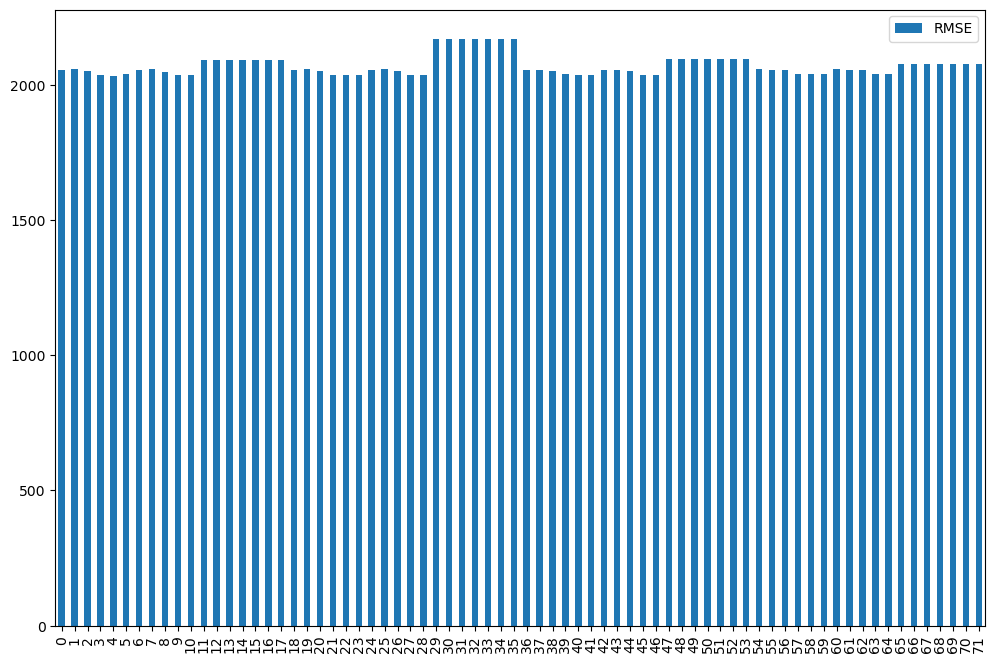

In [192]:
pred_df.plot(kind='bar', figsize=(12,8))

It looks like we have high errors in all our models. Also, the models tell us that not scaling made our model worse, so we will select one of our scalers. When we decrease the feature size, the model performance increases, but after 40, it continues decreasing, so we will select 40 features for our model.

#### Optimize the model

Let's predict the prep duration first and then calculate 'actual_total_delivery_time' after the prediction

In [196]:
train_df['prep_time'] = train_df['actual_total_delivery_time'] - train_df["estimated_store_to_consumer_driving_duration"] - train_df["estimated_order_place_duration"]

In [197]:
scalers = {
    "Standard scaler": StandardScaler(),
}

feature_sets = {
    "selected_features_40": importances.sort_values(by='Gini-importance')[-40:].index.tolist(),
}

for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f"-----scaled with {scaler_name}-------- included columns are {feature_set_name}")
        print("")
        for model_name in regression_models.keys():  
            X = train_df[feature_set].drop(columns=["estimated_store_to_consumer_driving_duration", 
                                           "estimated_order_place_duration"])
            y = train_df["prep_time"]
       
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            train_indices = X_train.index
            test_indices  = X_test.index
            
            
            X_scaled, y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name], X, y)
            
            
            X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
            _, y_predict_scaled, _, _ = make_regression(X_train_scaled, y_train_scaled[:,0], X_test_scaled, y_test_scaled[:,0], regression_models[model_name], model_name, verbose=False)
            rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test, y_predict_scaled, model_name)
            pred_dict["regression_model"].append(model_name)
            pred_dict["feature_set"].append(feature_set_name)
            pred_dict["scaler_name"].append(scaler_name)
            pred_dict["RMSE"].append(rmse_error)

-----scaled with Standard scaler-------- included columns are selected_features_40

Error = 2055.40771484375 in Ridge
Error = 2063.3402827182467 in DecisionTree
Error = 2040.7500250957783 in RandomForest
Error = 2037.8203125 in XGBoost
Error = 2035.7236370573405 in LGBM
Error = 2039.4483642578125 in MLP


It looks like LGBM outperforms our remaining models every time so we will continue with that.

In [198]:
scalers = {
    "Standard scaler": StandardScaler(),
}

feature_sets = {
    "selected_features_40": importances.sort_values(by='Gini-importance')[-40:].index.tolist(),
}

regression_models = {
    "LGBM": LGBMRegressor(),
}

for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f"-----scaled with {scaler_name}-------- included columns are {feature_set_name}")
        print("")
        for model_name in regression_models.keys():  
            #drop estimated_store_to_consumer_driving_duration and estimated_order_place_duration
            X = train_df[feature_set].drop(columns=["estimated_store_to_consumer_driving_duration", 
                                           "estimated_order_place_duration"])
            y = train_df["prep_time"]
            
            
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            train_indices = X_train.index
            test_indices  = X_test.index
            
            
            X_scaled, y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name], X, y)
            
            
            X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
            _, y_predict_scaled, _, _ = make_regression(X_train_scaled, y_train_scaled[:,0], X_test_scaled, y_test_scaled[:,0], regression_models[model_name], model_name, verbose=False)
            rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test, y_predict_scaled, model_name)
            pred_dict["regression_model"].append(model_name)
            pred_dict["feature_set"].append(feature_set_name)
            pred_dict["scaler_name"].append(scaler_name)
            pred_dict["RMSE"].append(rmse_error)

-----scaled with Standard scaler-------- included columns are selected_features_40

Error = 2035.7236370573405 in LGBM


In [200]:
pred_values_dict = {
    "actual_total_delivery_time": train_df["actual_total_delivery_time"][test_indices].values.tolist(), 
    "prep_duration_prediction":y_predict[:,0].tolist(),
    "estimated_store_to_consumer_driving_duration": train_df["estimated_store_to_consumer_driving_duration"][test_indices].values.tolist(),
    "estimated_order_place_duration": train_df["estimated_order_place_duration"][test_indices].values.tolist(),             
}

In [201]:
values_df = pd.DataFrame.from_dict(pred_values_dict)
values_df

,actual_total_delivery_time,prep_duration_prediction,estimated_store_to_consumer_driving_duration,estimated_order_place_duration
0,2448.0,1734.115287,380.0,251.0
1,1839.0,1508.588146,747.0,446.0
2,1927.0,2141.085685,543.0,251.0
3,2657.0,1312.559865,445.0,251.0
4,3596.0,1945.871826,691.0,446.0
...,...,...,...,...
35409,9557.0,2623.132706,768.0,446.0
35410,1864.0,2148.159250,324.0,446.0
35411,2674.0,1939.286320,791.0,251.0
35412,2234.0,1930.656157,687.0,251.0


Since we already made this calculation earlier, we should turn this back by adding estimated_store_to_consumer_driving_duration and estimated_order_place_duration to prep_duration_prediction to find sum_total_delivery_duration. 

In [202]:
values_df["sum_total_delivery_duration"] = values_df["prep_duration_prediction"] + values_df["estimated_store_to_consumer_driving_duration"] + values_df["estimated_order_place_duration"]
values_df

,actual_total_delivery_time,prep_duration_prediction,estimated_store_to_consumer_driving_duration,estimated_order_place_duration,sum_total_delivery_duration
0,2448.0,1734.115287,380.0,251.0,2365.115287
1,1839.0,1508.588146,747.0,446.0,2701.588146
2,1927.0,2141.085685,543.0,251.0,2935.085685
3,2657.0,1312.559865,445.0,251.0,2008.559865
4,3596.0,1945.871826,691.0,446.0,3082.871826
...,...,...,...,...,...
35409,9557.0,2623.132706,768.0,446.0,3837.132706
35410,1864.0,2148.159250,324.0,446.0,2918.159250
35411,2674.0,1939.286320,791.0,251.0,2981.286320
35412,2234.0,1930.656157,687.0,251.0,2868.656157


In [204]:
mean_squared_error(values_df["actual_total_delivery_time"], values_df["sum_total_delivery_duration"], squared=False)

2035.7236370573405

We still have a high level of errors. Let’s change the frame one last time. Here we will use prep_duration_prediction, estimated_store_to_consumer_driving_duration, and estimated_order_place_duration to predict actual_total delivery_duration. 

In [206]:
X = values_df[["prep_duration_prediction", "estimated_store_to_consumer_driving_duration", "estimated_order_place_duration"]]
y = values_df["actual_total_delivery_time"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [207]:
regression_models = {
    "LinearReg" : linear_model.LinearRegression(),
    "Ridge" : linear_model.Ridge(),
    "DecisionTree" : tree.DecisionTreeRegressor(max_depth=6),
    "RandomForest" : RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "LGBM": LGBMRegressor(),
    "MLP":  MLPRegressor(),
}
for model_name in regression_models.keys():
    _, y_predict, _, _= make_regression(
        X_train, y_train, X_test, y_test,regression_models[model_name], model_name, verbose=False)
    print("RMSE of:",model_name, mean_squared_error(y_test,y_predict, squared=False))

RMSE of: LinearReg 986.6912510303845
RMSE of: Ridge 986.6912510344928
RMSE of: DecisionTree 1235.578088153976
RMSE of: RandomForest 1271.8196417915926
RMSE of: XGBoost 1370.412425918564
RMSE of: LGBM 1079.2949179771774
RMSE of: MLP 994.1336901372637


As we can see from the output, our error rate drops by nearly half. This model’s performance is better than previous results. Based on these results, it seems that linear regression and LGBM will be our best solutions. 